In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot as pl

In [4]:
# read dataset

dataset_Udata = pd.read_csv('ml-100k/u.data', sep='\t', header=None)
dataset_Udata.columns = ['user_id', 'item_id', 'rating', 'timestamp']

In [5]:
dataset_Udata

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [6]:
dataset_Ugenre = pd.read_csv('ml-100k/u.genre', sep='|', header=None)
dataset_Ugenre.columns = ['genre', 'genre_id']


In [7]:
dataset_Ugenre

,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [8]:
dataset_Uitem = pd.read_csv('ml-100k/u.item', sep='|', header=None, encoding='latin-1')
dataset_Uitem.columns = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [9]:
dataset_Uitem.drop(columns=['video_release_date', 'IMDb_URL'], inplace=True)
dataset_Uitem

,item_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# user id | age | gender | occupation | zip code
dataset_Uuser = pd.read_csv('ml-100k/u.user', sep='|', header=None)
dataset_Uuser.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
dataset_Uuser.drop(columns=['zip_code'], inplace=True)

In [11]:
dataset_Uuser

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


## sparsity

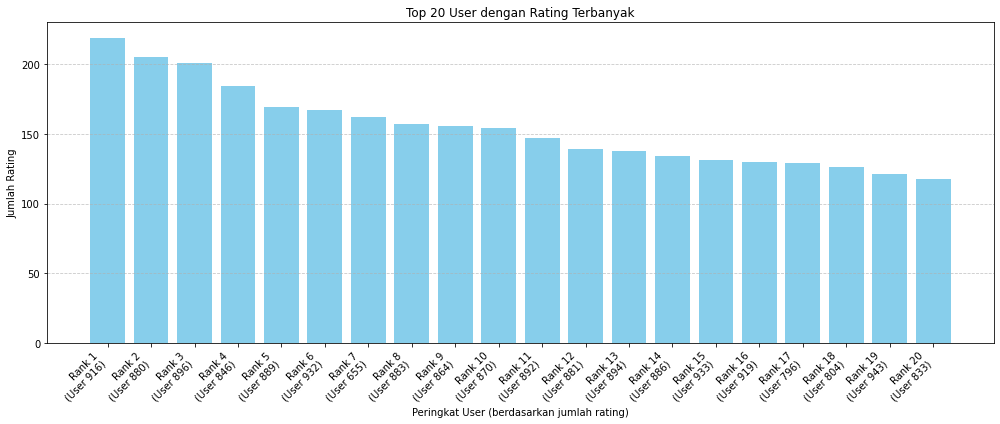

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u5.test', sep='\t', names=column_names)

# 2. Hitung jumlah rating per user, urutkan dari terbanyak
ratings_per_user = df['user_id'].value_counts().sort_values(ascending=False)

# 3. Ambil top 20 user
top_users = ratings_per_user.head(20)

# 4. Buat label sumbu X dalam format: Rank 1\n(User 196), dll
user_labels = [f'Rank {i+1}\n(User {user_id})' for i, user_id in enumerate(top_users.index)]

# 5. Plot
plt.figure(figsize=(14, 6))
plt.bar(user_labels, top_users.values, color='skyblue')
plt.title('Top 20 User dengan Rating Terbanyak')
plt.xlabel('Peringkat User (berdasarkan jumlah rating)')
plt.ylabel('Jumlah Rating')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [51]:
# fungsi 

def grafikUserRatingMaxtoMin(file="'ml-100k/u5.test'"):
    """
    Fungsi untuk membuat grafik jumlah rating per user dari yang paling banyak ke paling sedikit.
    
    Args:
    df (DataFrame): DataFrame yang berisi data rating.
    
    Returns:
    None
    """

    
    column_names = ['user_id', 'item_id', 'rating', 'timestamp']
    df = pd.read_csv(file, sep='\t', names=column_names)
    # Hitung jumlah rating per user
    ratings_per_user = df['user_id'].value_counts().sort_values(ascending=False) 
    # Buat plot
    plt.figure(figsize=(12, 6))
    ratings_per_user.plot(kind='bar', color='skyblue')
    plt.title('Jumlah Rating per User')
    plt.xlabel('User ID')
    plt.ylabel('Jumlah Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan grafik


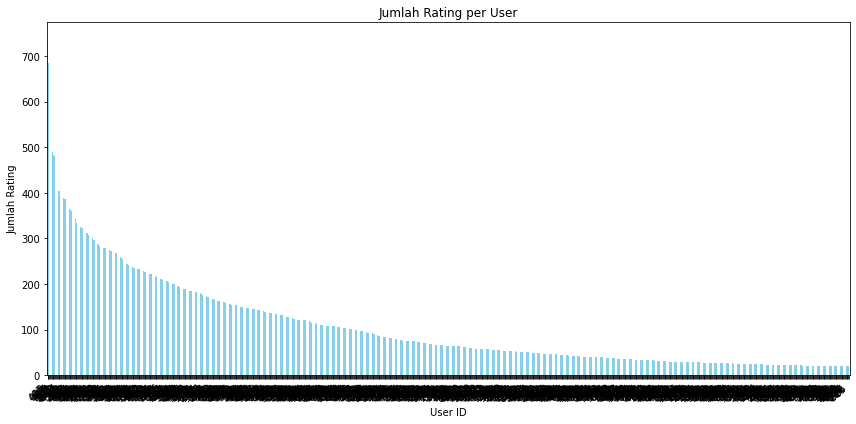

In [52]:
call = grafikUserRatingMaxtoMin(file='ml-100k/u.data')


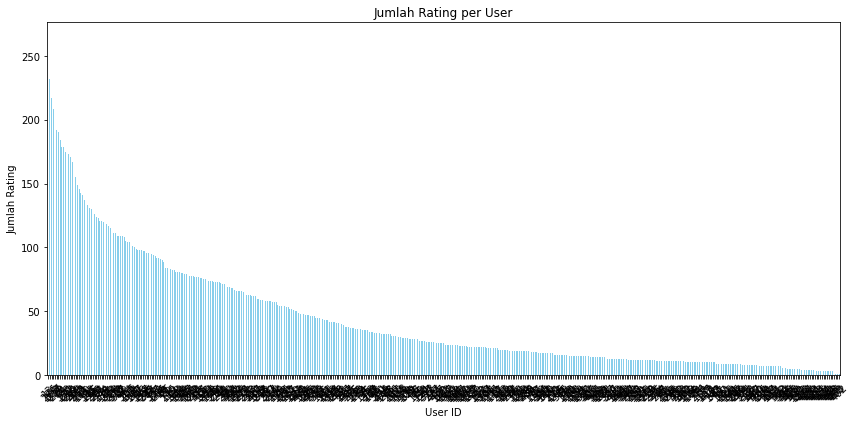

In [7]:
call1 = grafikUserRatingMaxtoMin(file='ml-100k/u1.test')


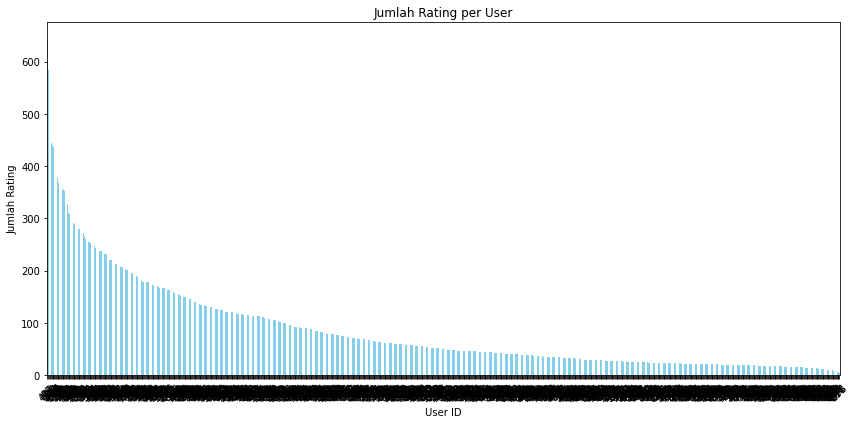

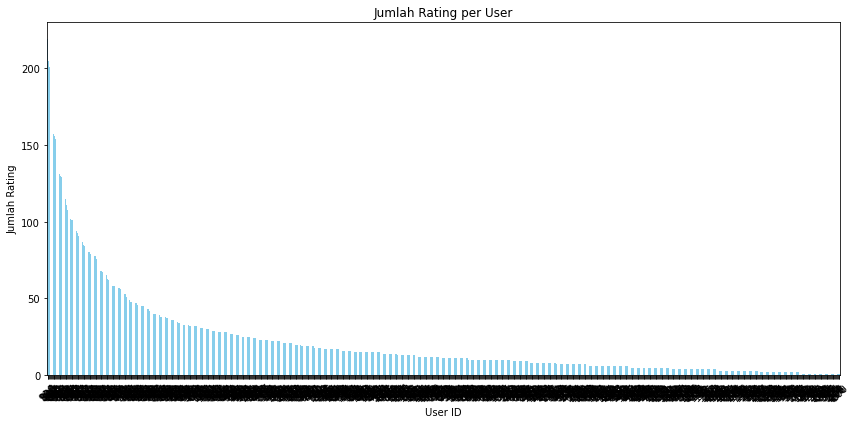

In [8]:
call3 = grafikUserRatingMaxtoMin(file='ml-100k/u5.base')
call4 = grafikUserRatingMaxtoMin(file='ml-100k/u5.test')


In [45]:
def grafik2(file='ml-100k/u5.test', top_n=None):
    """
    Menampilkan grafik jumlah rating per user dari terbanyak ke tersedikit.
    Menampilkan nilai di atas setiap bar jika jumlah user sedikit,
    mencetak nilai max dan min rating, serta total user yang aktif.
    
    Returns:
    tuple: (max_rating, min_rating, total_user)
    """
    
    column_names = ['user_id', 'item_id', 'rating', 'timestamp']
    df = pd.read_csv(file, sep='\t', names=column_names)

    # Hitung jumlah rating per user (urut menurun)
    ratings_per_user = df['user_id'].value_counts().sort_values(ascending=False)

    max_rating = ratings_per_user.max()
    min_rating = ratings_per_user.min()
    total_user = ratings_per_user.shape[0]
    
    # Ambil top-n jika diminta
    if top_n:
        ratings_to_plot = ratings_per_user.head(top_n)
    else:
        ratings_to_plot = ratings_per_user

    # Buat plot
    plt.figure(figsize=(14, 6))
    bars = plt.bar(ratings_to_plot.index.astype(str), ratings_to_plot.values, color='orange')
    
    plt.title(f'Jumlah Rating per User - {file}\nMax: {max_rating}, Min: {min_rating}, Total User: {total_user}')
    plt.xlabel('User ID')
    plt.ylabel('Jumlah Rating')

    if len(ratings_to_plot) <= 30:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval),
                     ha='center', va='bottom', fontsize=8)

    if len(ratings_to_plot) > 50:
        plt.xticks([], [])
    else:
        plt.xticks(rotation=45, ha='right')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return max_rating, min_rating, total_user


C:\Users\ASUS\AppData\Local\Temp/ipykernel_30956/1902647896.py:42: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([], [])


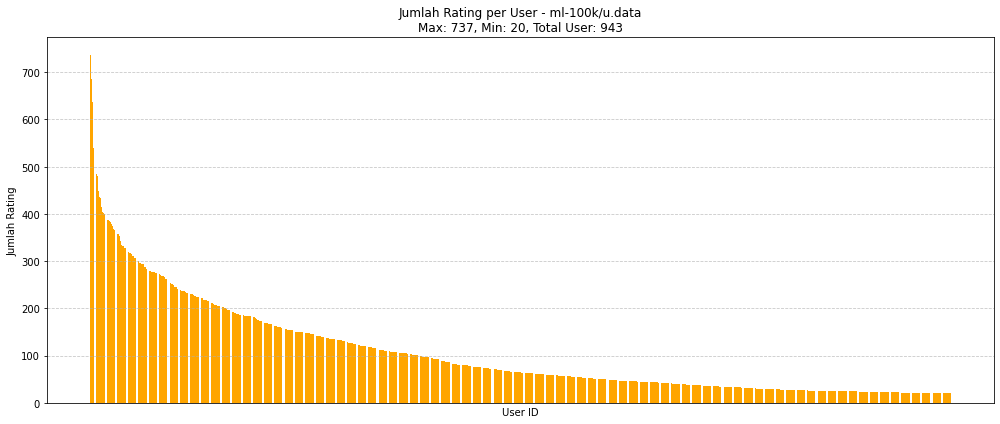

Max rating: 737, Min rating: 20, Total user aktif: 943


In [46]:
max_r, min_r, total = grafik2('ml-100k/u.data')
print(f"Max rating: {max_r}, Min rating: {min_r}, Total user aktif: {total}")


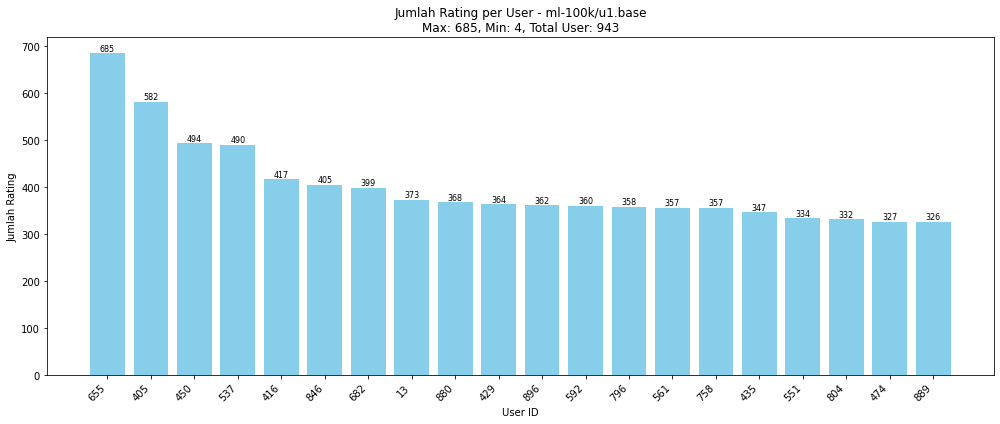

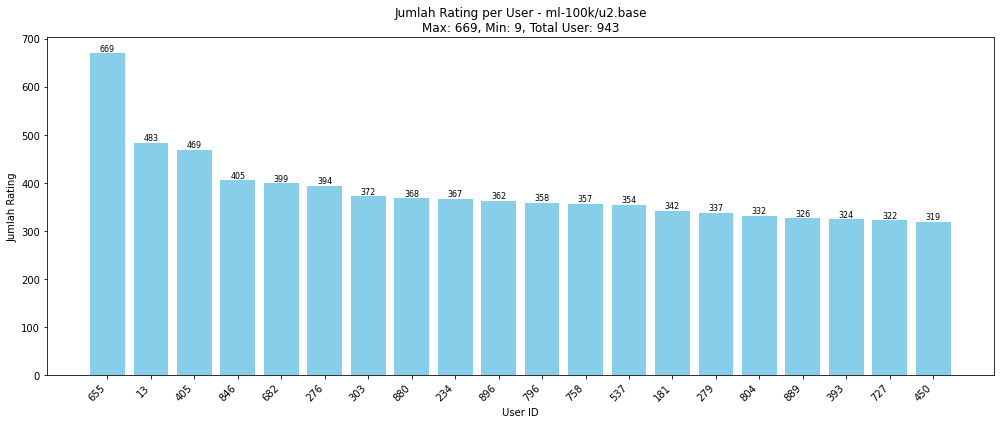

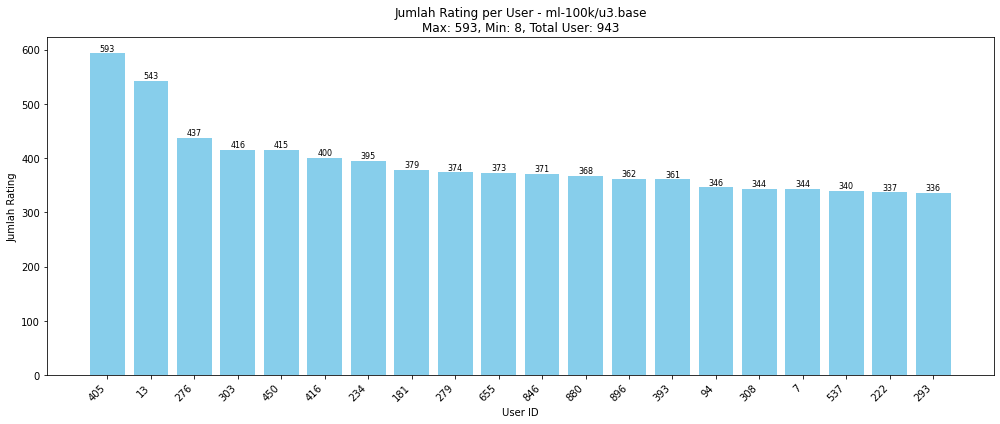

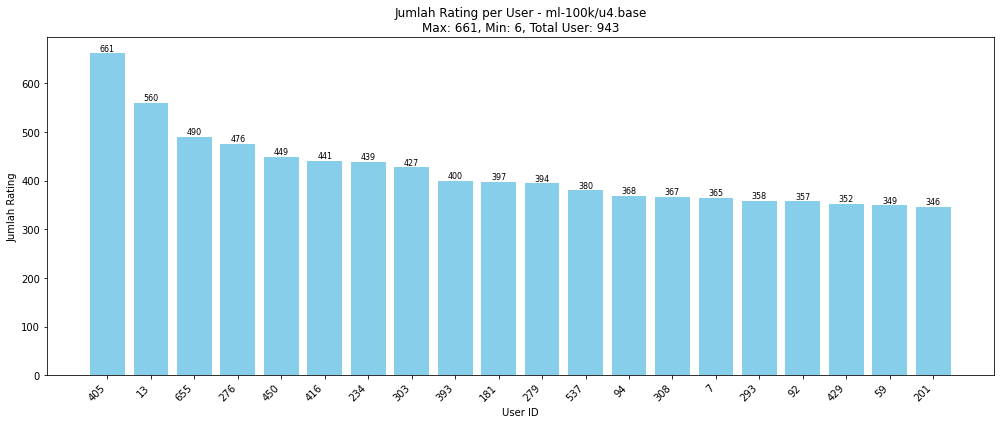

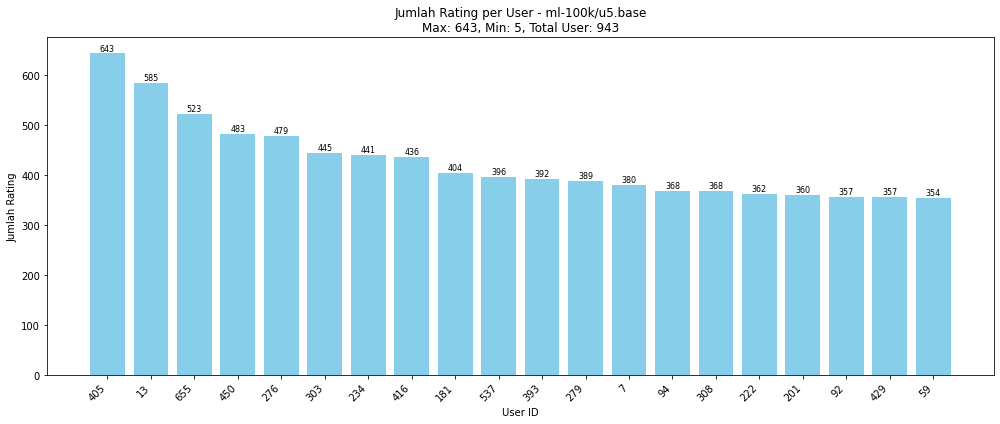

Jumlah rating maksimum per user di tiap fold:
u1.base: (685, 4, 943) rating
u2.base: (669, 9, 943) rating
u3.base: (593, 8, 943) rating
u4.base: (661, 6, 943) rating
u5.base: (643, 5, 943) rating


In [40]:
max_ratings = {}
for i in range(1, 6):
    file_path = f'ml-100k/u{i}.base'
    max_rating = grafik2(file=file_path, top_n=20)
    max_ratings[f'u{i}.base'] = max_rating

# Tampilkan hasil perbandingan
print("Jumlah rating maksimum per user di tiap fold:")
for fold, max_val in max_ratings.items():
    print(f"{fold}: {max_val} rating")


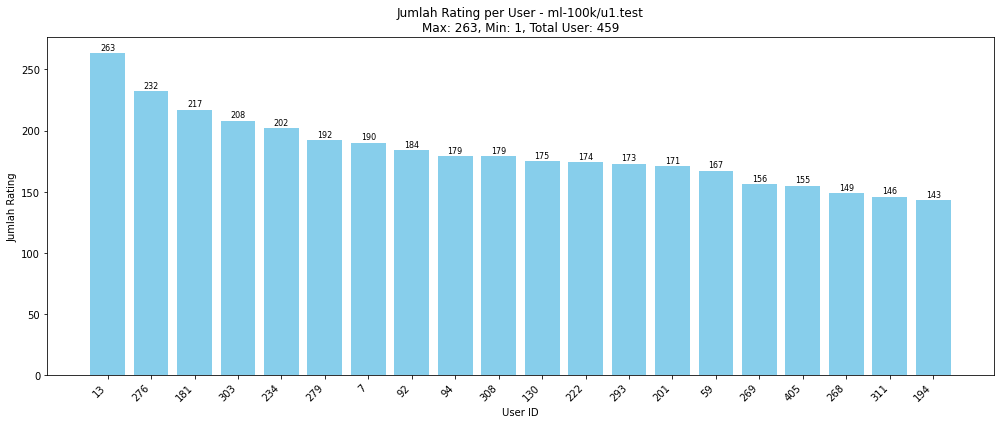

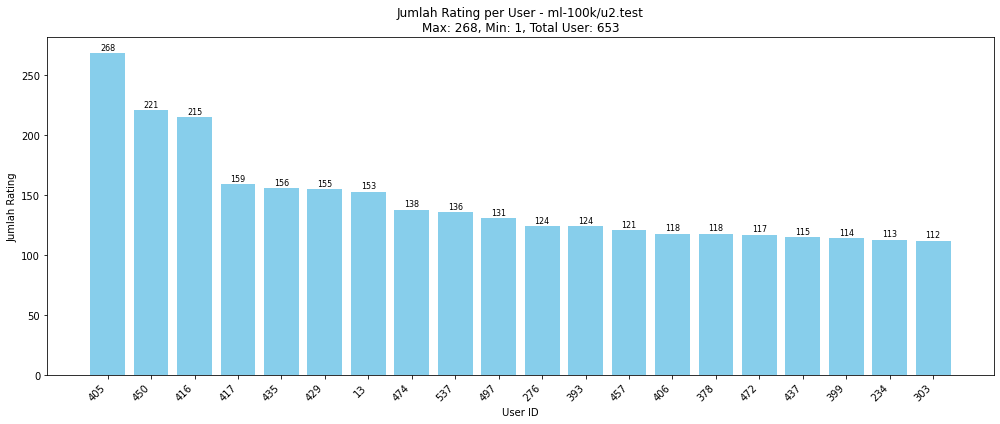

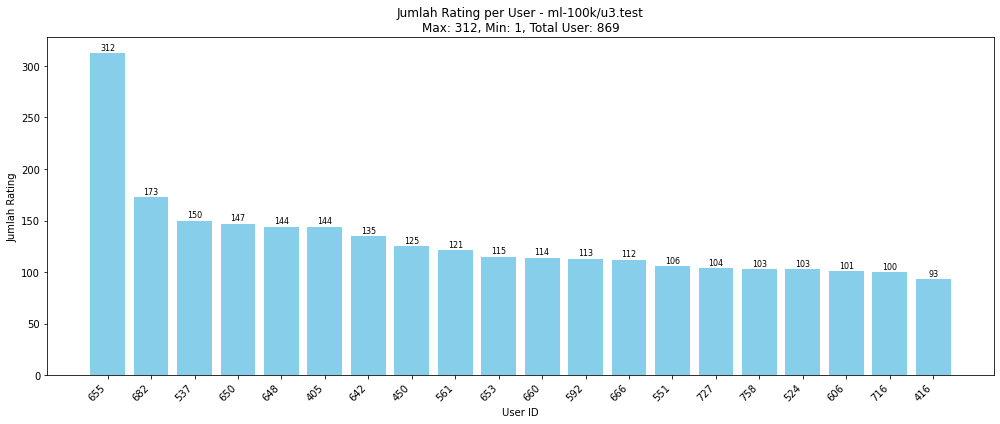

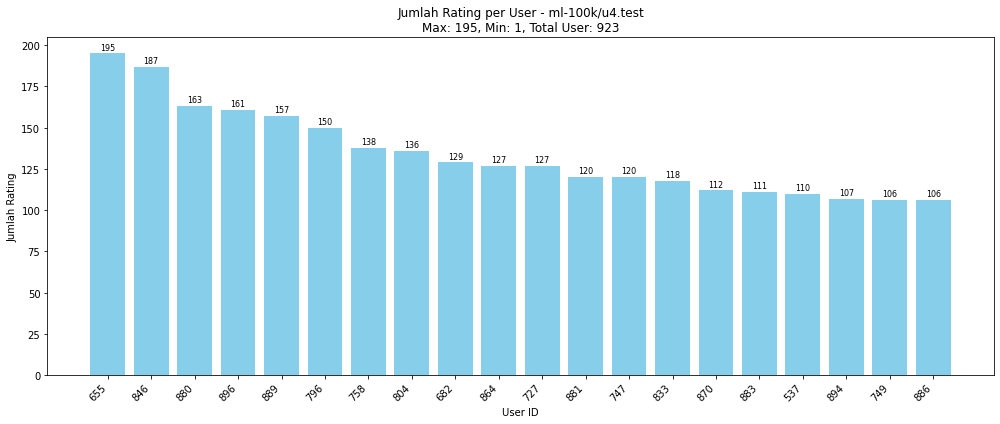

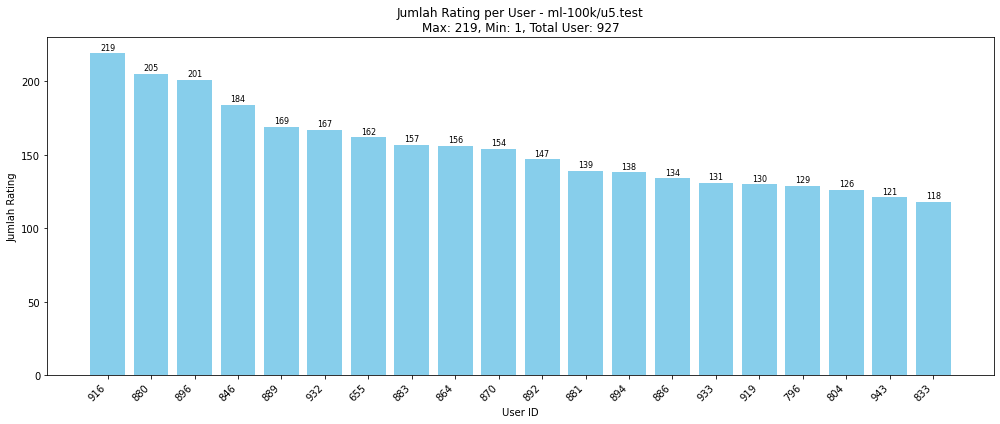

Jumlah rating maksimum per user ditest tiap fold:
u1.test: (263, 1, 459) rating
u2.test: (268, 1, 653) rating
u3.test: (312, 1, 869) rating
u4.test: (195, 1, 923) rating
u5.test: (219, 1, 927) rating


In [41]:
max_ratings = {}
for i in range(1, 6):
    file_path = f'ml-100k/u{i}.test'
    max_rating = grafik2(file=file_path, top_n=20)
    max_ratings[f'u{i}.test'] = max_rating

# Tampilkan hasil perbandingan
print("Jumlah rating maksimum per user ditest tiap fold:")
for fold, max_val in max_ratings.items():
    print(f"{fold}: {max_val} rating")


## minimal rating 20

In [36]:
import pandas as pd

# 1. Load data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

# 2. Hitung jumlah rating per user
ratings_per_user = df['user_id'].value_counts()

# 3. Cek apakah semua user memberi rating minimal 20 film
min_ratings = ratings_per_user.min()
all_users_20_plus = (ratings_per_user >= 20).all()

print(f"Jumlah minimal rating oleh seorang user: {min_ratings}")
print(f"Apakah semua user memberi rating ≥ 20 film? {'Ya' if all_users_20_plus else 'Tidak'}")

# (Opsional) Tampilkan user yang memberi < 20 rating (kalau ada)
if not all_users_20_plus:
    under_20_users = ratings_per_user[ratings_per_user < 20]
    print("\nUser dengan rating < 20:")
    print(under_20_users)


Jumlah minimal rating oleh seorang user: 20
Apakah semua user memberi rating ≥ 20 film? Ya


In [34]:
import pandas as pd

# 1. Load data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

# 2. Hitung jumlah rating per user
ratings_per_user = df['user_id'].value_counts()

# 3. Cari user yang memberi tepat 20 rating
users_with_20_ratings = ratings_per_user[ratings_per_user == 20].index.tolist()

print(f"Jumlah user yang memberi tepat 20 rating:  {len(users_with_20_ratings)}")

# 4. Ambil item_id yang dirating oleh user-user tersebut
df_20 = df[df['user_id'].isin(users_with_20_ratings)]

# 5. (Opsional) Lihat daftar item_id per user
grouped = df_20.groupby('user_id')['item_id'].apply(list)

# 6. Tampilkan contoh
for user_id, items in grouped.items():
    print(f"\nUser {user_id} merating {len(items)} film:")
    print(items)
    # Hentikan di 1 user saja untuk ringkasnya
    break


Jumlah user yang memberi tepat 20 rating:  32

User 19 merating 20 film:
[4, 435, 655, 153, 313, 310, 692, 382, 201, 258, 319, 288, 887, 211, 210, 268, 325, 202, 8, 294]


## rating 1-5

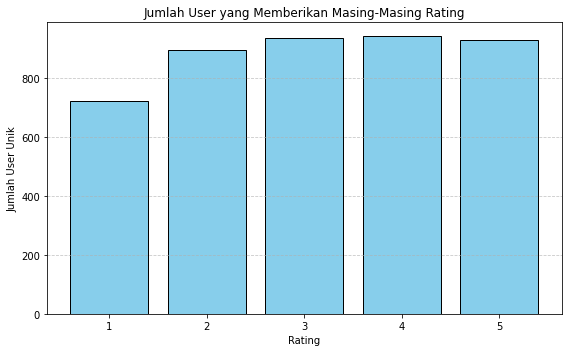

In [ ]:
# Untuk setiap rating (1-5), hitung berapa user unik yang pernah memberikan rating tersebut
rating_user_counts = df.groupby('rating')['user_id'].nunique()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(rating_user_counts.index, rating_user_counts.values, color='skyblue', edgecolor='black')
plt.title('Jumlah User yang Memberikan Masing-Masing Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah User Unik')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig('eda_Img/jumlahUser rating.png')
plt.show()

## 20 film top

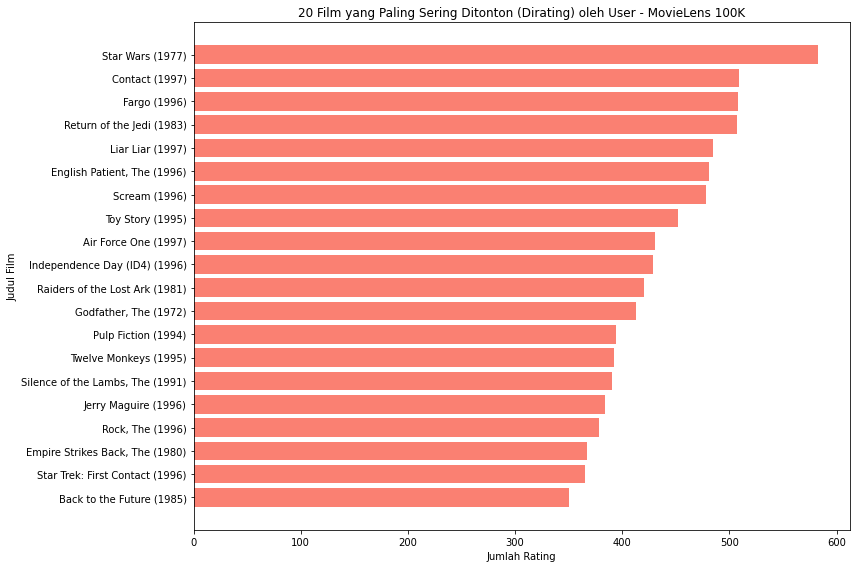

In [ ]:
movies = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['movie_id', 'title'])

# Hitung berapa kali setiap movie_id muncul (berapa banyak user yang menonton/rating)
top_movies = df['movie_id'].value_counts().head(20).reset_index()
top_movies.columns = ['movie_id', 'rating_count']

# Gabungkan dengan nama film
top_movies = top_movies.merge(movies, on='movie_id')

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_movies['title'], top_movies['rating_count'], color='salmon')
plt.gca().invert_yaxis()  # Supaya ranking tertinggi di atas
plt.title('20 Film yang Paling Sering Ditonton (Dirating) oleh User - MovieLens 100K')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.tight_layout()
# plt.savefig('eda_Img/topItem.png')
plt.show()